# Customer Churn Analysis:

Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [2]:
# Importing required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# lets import dataset in the jupyter notebook using csv file
df=pd.read_csv("Telecom_customer_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
# lets check the top 10 rows of the dataset
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [5]:
# lets check last 10 rows of the dataset
df.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


# Exploratory Data Analysis (EDA) & PreProcessing:

In [6]:
# Lets check the shape of the dataset
df.shape

(7043, 21)

* Here we can see that there are total of 7043 rows in 21 columns.

In [7]:
# Checking the names of the columns present in the given dataset
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

* These are all the columns present in the dataset.

In [8]:
# lets check the datatypes of all the columns present in the dataset
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

* Here we can see that there are 18 object dtype columns and there are 2 columns with integer type data and 1 Float type data.
* Here while i was studying dataset initially i observed that there are 2 columns named Monthly charges and Total charges both are having float type data but here Monthly charges are shown float data type and TotalCharges are shown object datatype, we need to covert it to float.
* Here we can also see a column name Churn which is our target column is having object type datatype and it is having only yes or no, so its a categorical columns, hence it is a classification problem.

In [9]:
# Lets check unique values present in all the columns of the dataset
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

* Here we can see that there is a column Customer ID which has all the unique values, this could affect our model performance, so we need to drop it.

In [11]:
# lets drop the column customer ID first before we move ahead
df=df.drop(["customerID"],axis=1)

* Here we have successfully dropped the column

In [12]:
# Now lets also change the datatype of column TotalCharges
df["TotalCharges"]=df["TotalCharges"].str.strip()
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"])

In [13]:
# now lets check information regarding the project
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


* Here we can see that there are no null values present in any column of this dataset.
* Here we can also see that we have successfully converted the datatype of TotalCharges from object to float64.

In [14]:
# Now lets check the value counts in all the columns of the dataset
for i in df.columns:
    print(df[i].value_counts())
    print('--------------------------------------------------')

Male      3555
Female    3488
Name: gender, dtype: int64
--------------------------------------------------
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
--------------------------------------------------
No     3641
Yes    3402
Name: Partner, dtype: int64
--------------------------------------------------
No     4933
Yes    2110
Name: Dependents, dtype: int64
--------------------------------------------------
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
--------------------------------------------------
Yes    6361
No      682
Name: PhoneService, dtype: int64
--------------------------------------------------
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
--------------------------------------------------
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
--------------

In [15]:
# Lets check for the presence of mull values in the datast
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

here we can see that there are 11 null values present in Total Charges may be it happened when we changed its datatype from object to float.

In [16]:
# Lets fill null values with mean of the TotalCharges column.
df["TotalCharges"]=df["TotalCharges"].fillna(df["TotalCharges"].mean())
df["TotalCharges"]

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [18]:
#Lets check the null values again
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

* Now we can see that we have successfully replaced all null values with mean.

In [19]:
# lets separate categorical and integer columns
category=[]
integer=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        category.append(i)
    else:
        integer.append(i)
print(category)
print(integer)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [20]:
# Now lets check our target column churn for unique values
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

* There are only 2 type of values present as our initial impressions i.e. Yes and No

In [22]:
#lets check whether there are any space or empty observations present in the target column
df.loc[df["Churn"]=="  "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


* Here we can clearly see that there are no empty spaces present in our target column "Churn"

In [23]:
#Lets check the statistical description of our dataset
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [24]:
# Lets check all the columns
df.describe(include='all')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043.000000,7043
unique,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2283.300441,NaN
std,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2265.000258,NaN
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,402.225000,NaN
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1400.550000,NaN
75%,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3786.600000,NaN


* Here we can see that in integer columns, there is difference in mean and 50% percentile which denotes towards Skewness of the data
* There is difference in 75% and Max as well which denotes to presence of outliers in the dataset.

# Visualization:

# Univariate Analysis:

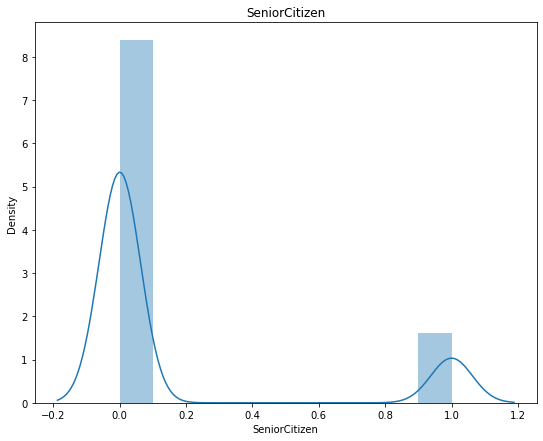

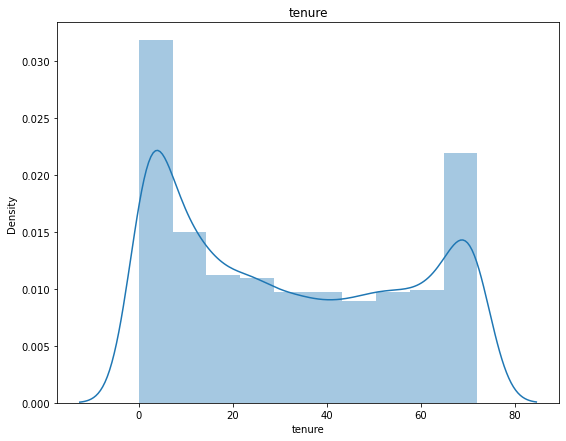

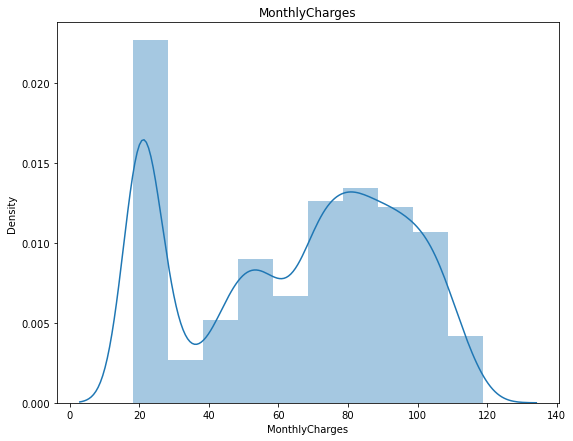

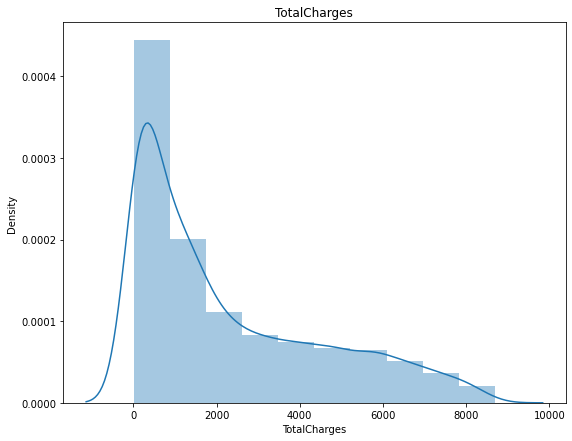

In [25]:
# Lets visualize all integer columns using distribution plot
for i in df[integer]:
    plt.figure(figsize=(9,7))
    sns.distplot(df[i],bins=10)
    plt.title(i)
    plt.show()

* Here looking at these distribution plots we can clearly see presence of skewness in all the integer columns.

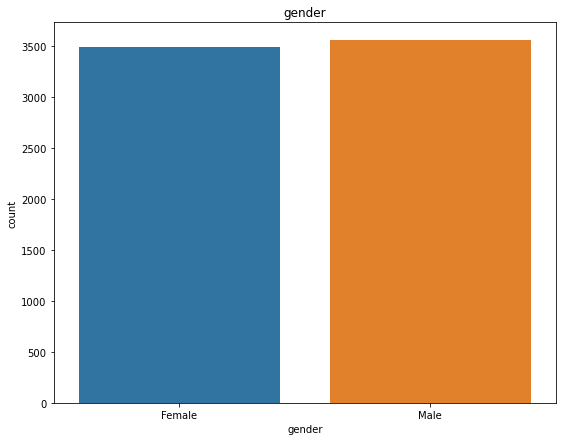

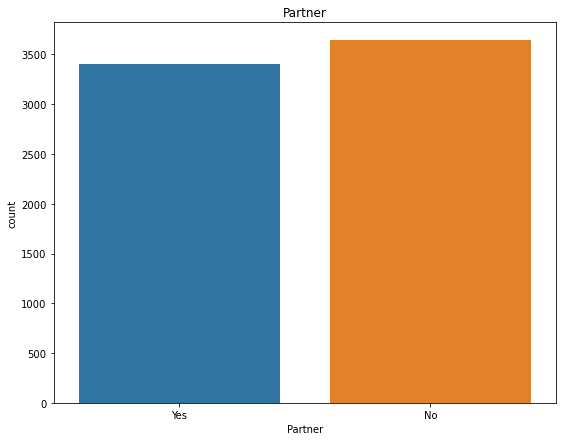

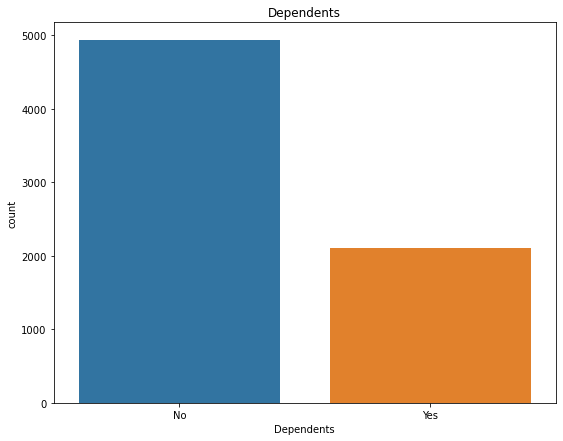

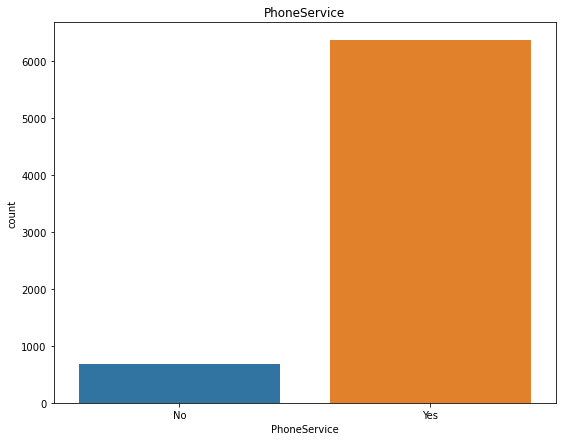

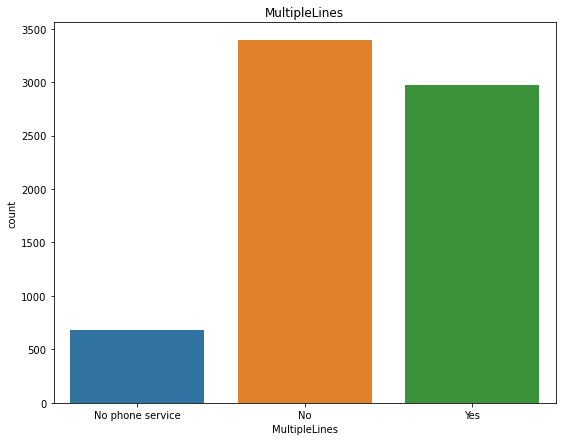

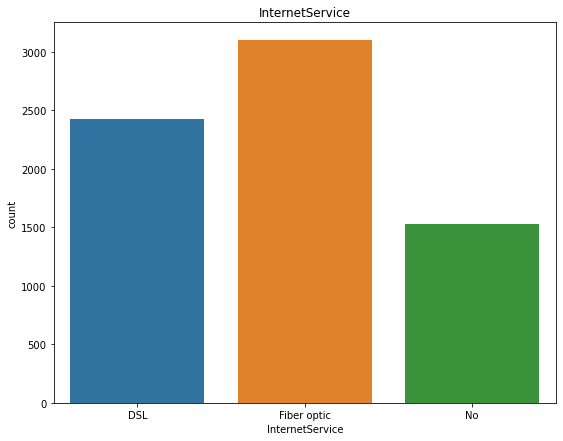

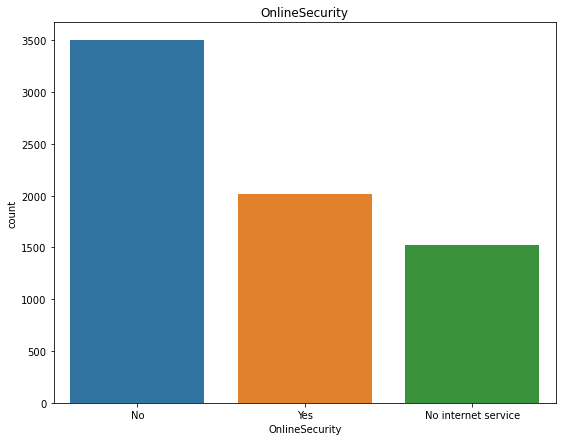

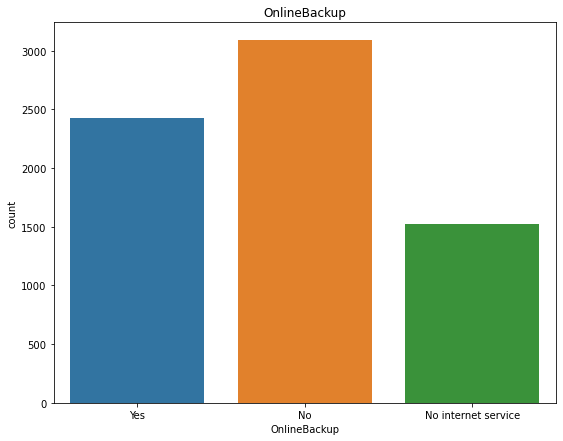

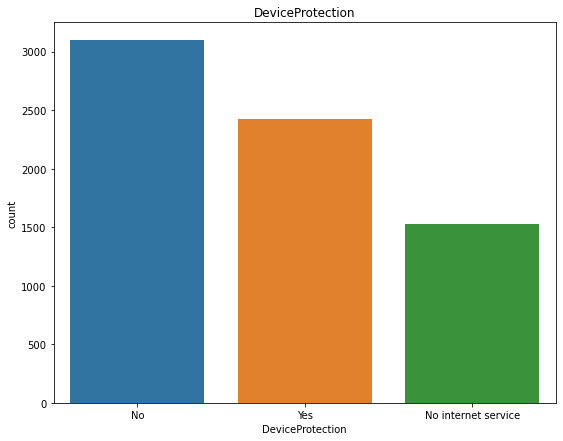

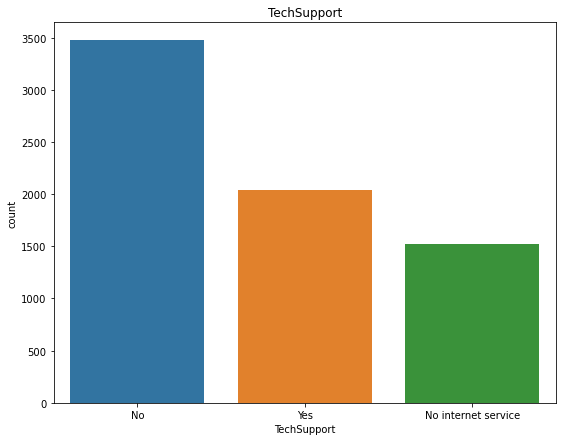

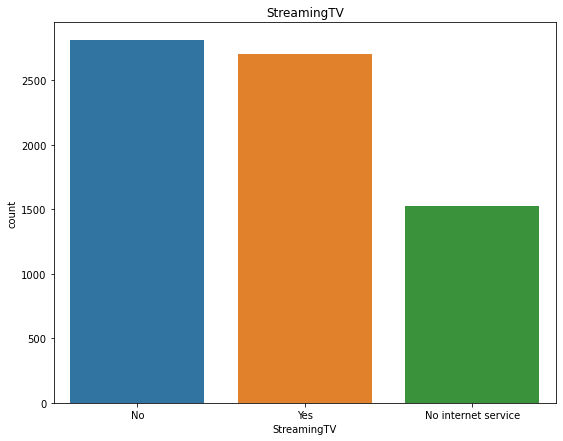

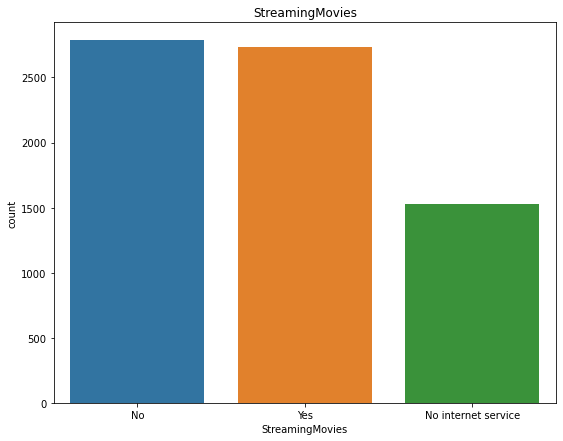

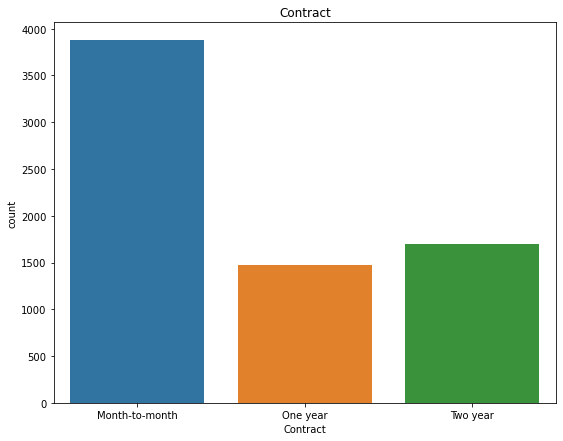

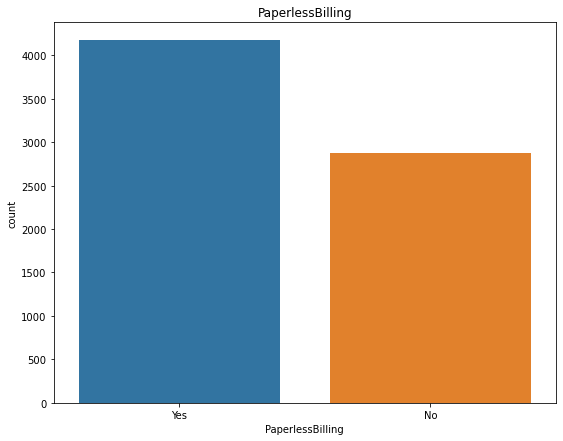

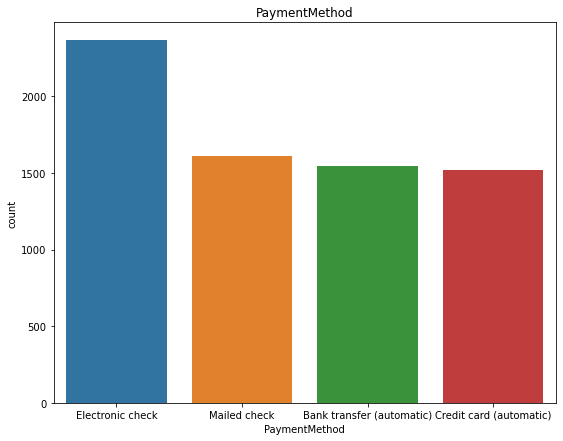

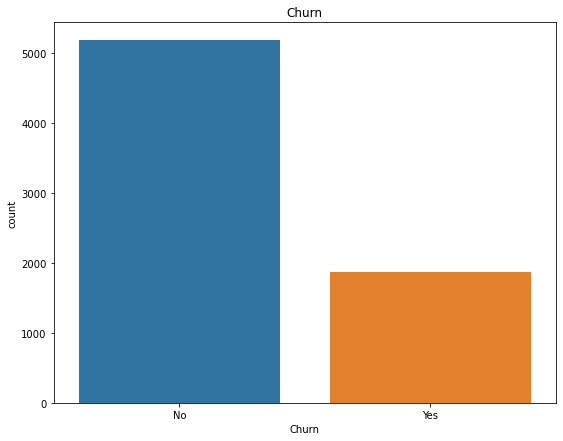

In [27]:
# Now lets visualize all the category columns
for i in df[category]:
    plt.figure(figsize=(9,7))
    sns.countplot(df[i])
    plt.title(i)
    plt.show()

* Here we can see that Both the genders have similar counts, same stands for partner or not.
* Here we can observe that most of the customers dont have dependents.
* here in phone service we can see that most of the customers are with the phone services.
* Here in multiple line column we can clearly see that most customer don't have or use multiple lines.
* Here in internet service column we can see that majority of customers use Fiber optic based Internet Service.
* here in online security majority of people dont have any kind of online security.
* here most of the people don't take online backup.
* Same stands for Device Protection that very few people buy/use device protection.
* Majority of people don't use tech support for any issues.
* majority of people don't stream movies as well.
* Majority of people use month to month billing/recharge/contract, very few people go for long term contracts.
* Most of the people have opted for paperless billing which is good for environment.
* Most of the people have switched to electronic payment mode, whether its electronic check, bank transfer or credit card payments.
* Here in the target column we can see that there is a data imbalancing issue which we need to handle.

# Bivariate Analysis:

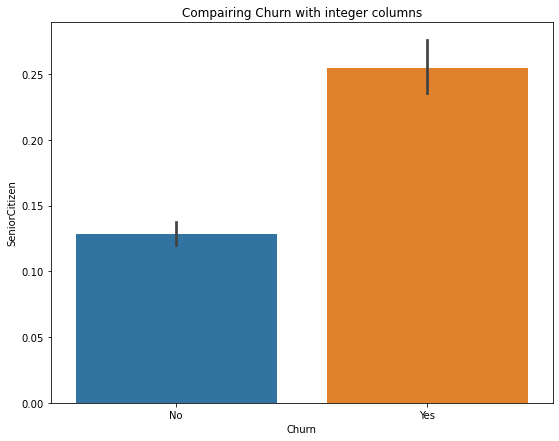

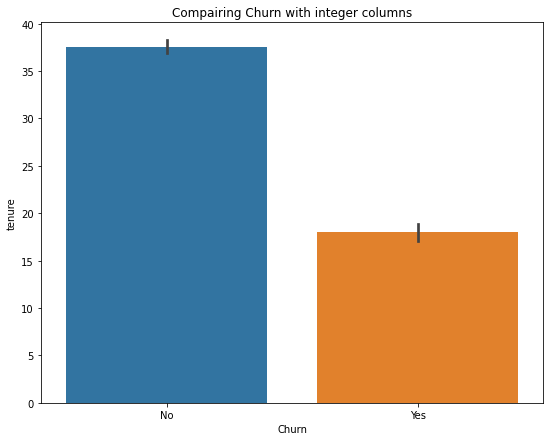

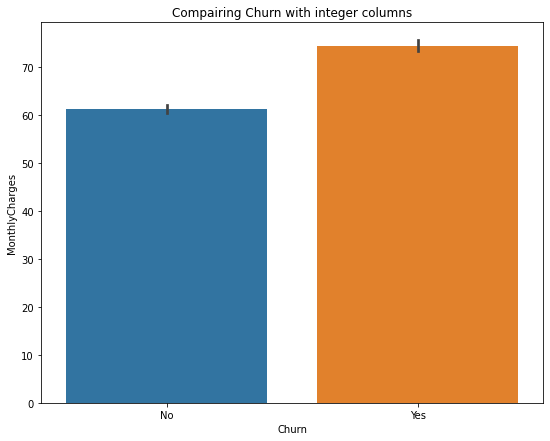

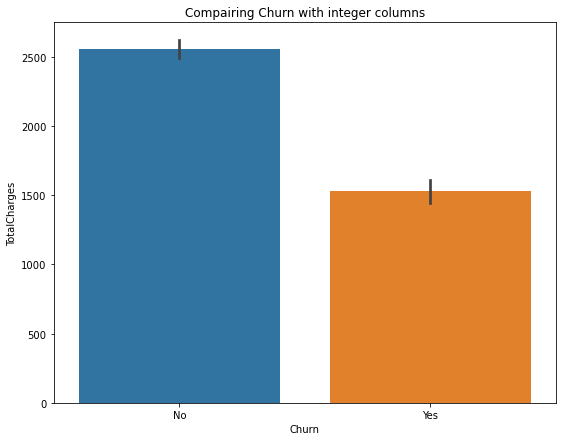

In [56]:
# lets compare churn with integer columns
for i in df[integer]:
    plt.figure(figsize=(9,7))
    sns.barplot(x="Churn",y=df[i], data=df)
    plt.title("Compairing Churn with integer columns")
    plt.show()

* Conclusions regarding churn correlation with integer columns

1) we can say if the customer or person is senior citzen then there are chances of Churn

2) If tenure is high then there are very less chances of Churn.

3) If monthly Charges are high then there are high chances of Churn.

4) If Total Charges are High then there is very little chance of Churn.

In [64]:
# Lets compare churn with category columns
cat=df[category].drop(["Churn"],axis=1)

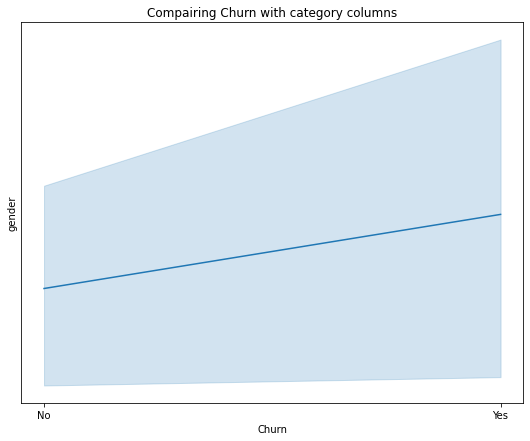

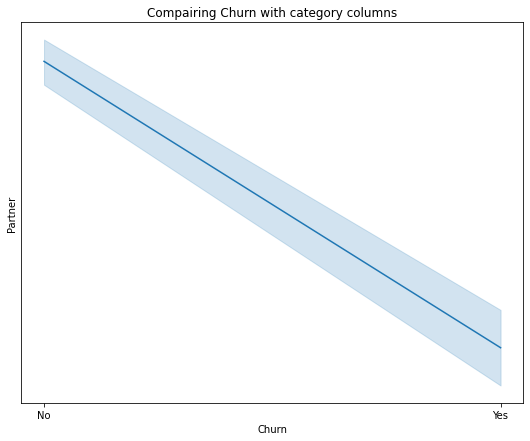

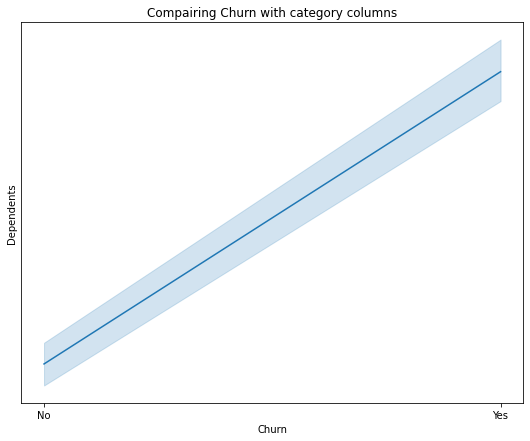

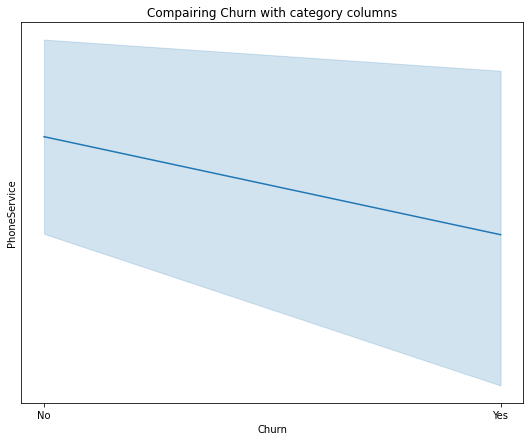

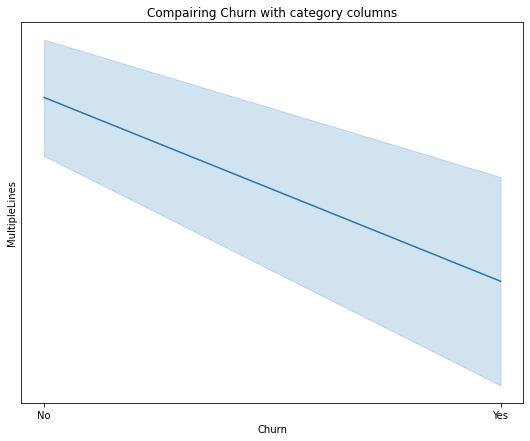

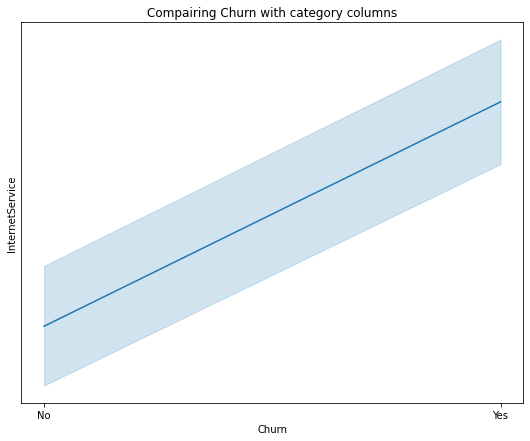

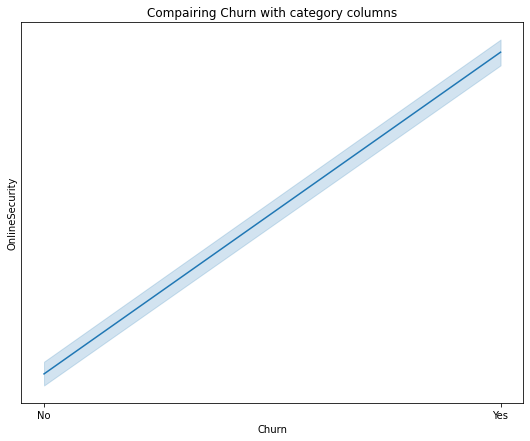

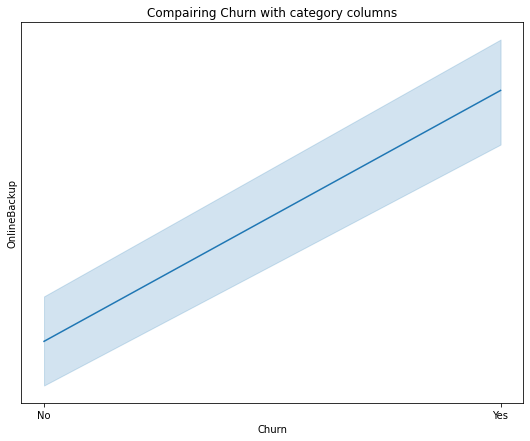

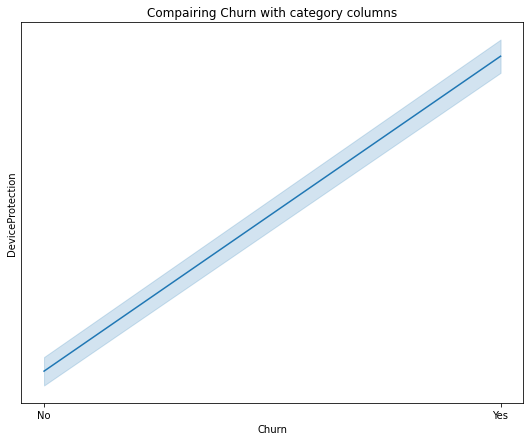

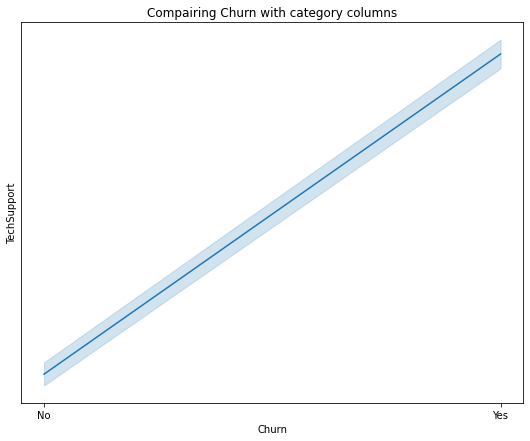

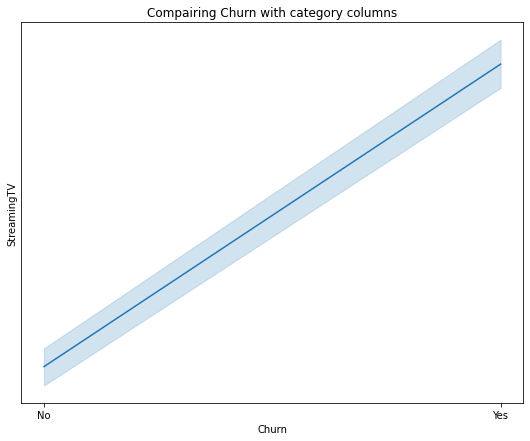

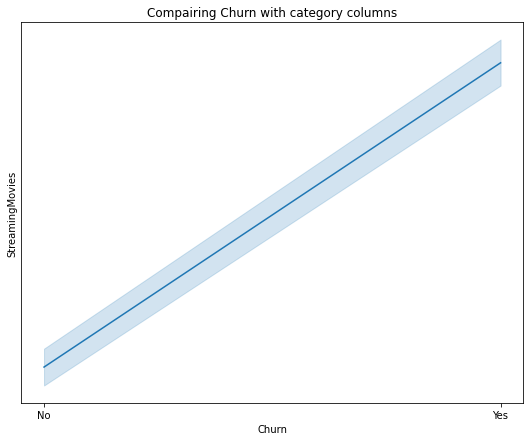

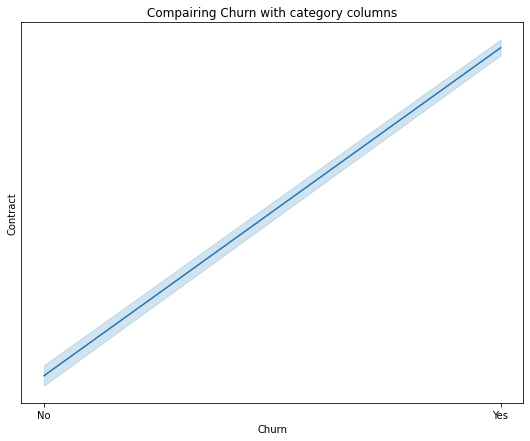

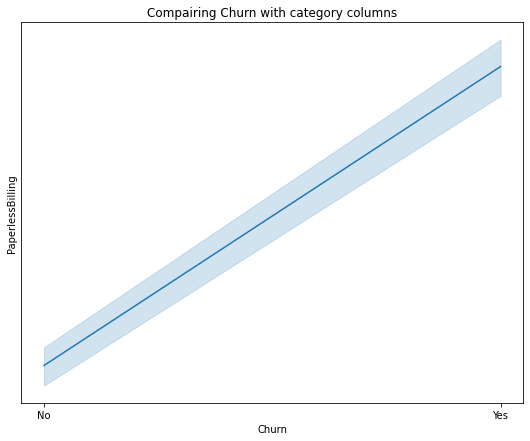

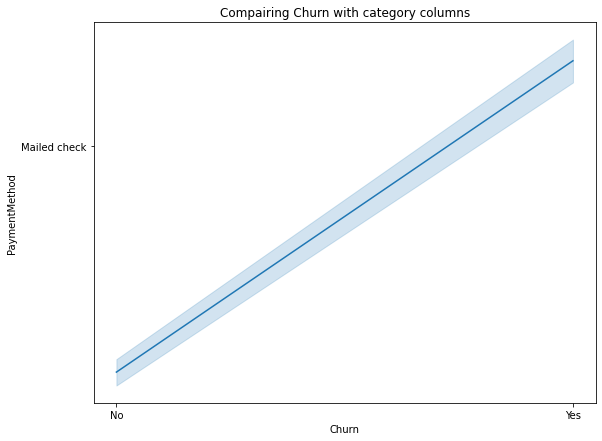

In [70]:
for i in cat:
    plt.figure(figsize=(9,7))
    sns.lineplot(x="Churn",y=df[i],data=df)
    plt.title("Compairing Churn with category columns")
    plt.show()

* Here chances of churn is almost equal for both the genders.
* There are less chances of churn for the customers having partner.
* Customers having dependents are having high chances of churn.
* customers with no phone service are less churned as compared to customers with phone service
* customers with multiple lines are small in number but customers with multiple lines are less churned
* Customers with internet service are more likely to churn
* Customers without online security are more churned
* Customers without online backup are more churned
* Customers without device protection are more likely to churn
* Customers without TechSupport are more likely to churn.
* Customers without Streaming Tv are more likey to churn than customers with Streaming Tv.
* Customers Without Streaming Movies are more likely to churn.
* Customers with month-to-month contract are most likely to churn than customers in long term contracts.
* Customers with paperless billing are more likely to churn
* Customers with Mailed check are more likely to churn.

# MultiVariate Analysis:

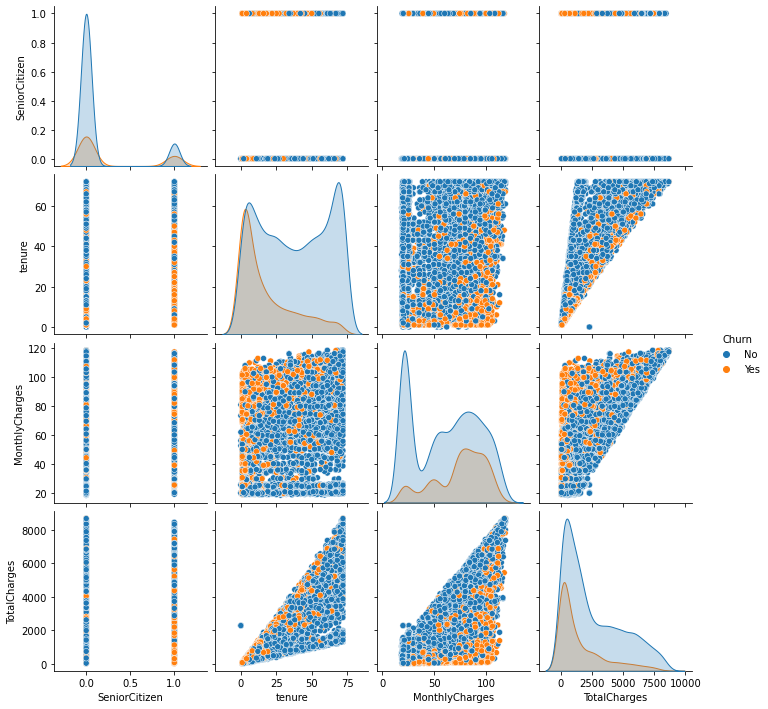

In [71]:
# Lets visualize and compare all the columns present in the dataset with Churn as hue
sns.pairplot(df,hue="Churn")

* Here we can see presence of outliers in some of the columns.

# Outliers:

<AxesSubplot:>

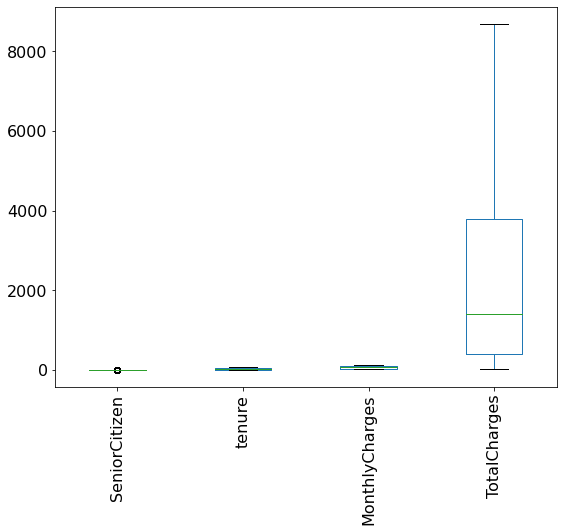

In [82]:
# Lets check presence of outliers in dataset using boxplot
df.plot(rot=90,kind="box",fontsize=16,figsize=(9,7))

* There is a presence of very few outliers in SeniorCitizen only.As senior citizen is caregorical column we can leave this and not remove outliers from this column.

# Skewness:

In [81]:
# let us check for the presence of skewness in the dataset
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

Here we can see presence of skewness in 2 columns SeniorCitizen and TotalCharges.

In [83]:
# Lets remove skewness using Yeo-Johnson method
# importing all required libraries
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method='yeo-johnson')
'''
parameters:
method= 'box_cox' or'yeo-johnson'
'''

"\nparameters:\nmethod= 'box_cox' or'yeo-johnson'\n"

In [88]:
# lets implement 'yeo-johnson' method 
df[['TotalCharges']]=scaler.fit_transform(df[['TotalCharges']].values)

In [89]:
# lets check the skewness again
df[["TotalCharges"]].skew()

TotalCharges   -0.144899
dtype: float64

* We have successfully removed skewness from the column TotalCharges.

# Encoding:

In [91]:
# Lets encode all the categorial column using Label Encoder
# Importing all the required libraries for encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df[category]:
    df[i]=le.fit_transform(df[i].values.reshape(-1,1))
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,-1.810588,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0.253313,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,-1.387269,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0.232253,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,-1.250118,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,0.295688,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,1.567097,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,-0.859899,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,-0.922968,1


* We have successfully converted categorical data and all the values of all the columns are now numeric.

In [92]:
# Lets check correlation of all the columns in the dataset
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.002691,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.105478,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.344618,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.087831,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.865270,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.084371,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.458682,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.207654,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.242515,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.344209,-0.195525


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]),
 [Text(0, 0.5, 'gender'),
  Text(0, 1.5, 'SeniorCitizen'),
  Text(0, 2.5, 'Partner'),
  Text(0, 3.5, 'Dependents'),
  Text(0, 4.5, 'tenure'),
  Text(0, 5.5, 'PhoneService'),
  Text(0, 6.5, 'MultipleLines'),
  Text(0, 7.5, 'InternetService'),
  Text(0, 8.5, 'OnlineSecurity'),
  Text(0, 9.5, 'OnlineBackup'),
  Text(0, 10.5, 'DeviceProtection'),
  Text(0, 11.5, 'TechSupport'),
  Text(0, 12.5, 'StreamingTV'),
  Text(0, 13.5, 'StreamingMovies'),
  Text(0, 14.5, 'Contract'),
  Text(0, 15.5, 'PaperlessBilling'),
  Text(0, 16.5, 'PaymentMethod'),
  Text(0, 17.5, 'MonthlyCharges'),
  Text(0, 18.5, 'TotalCharges'),
  Text(0, 19.5, 'Churn')])

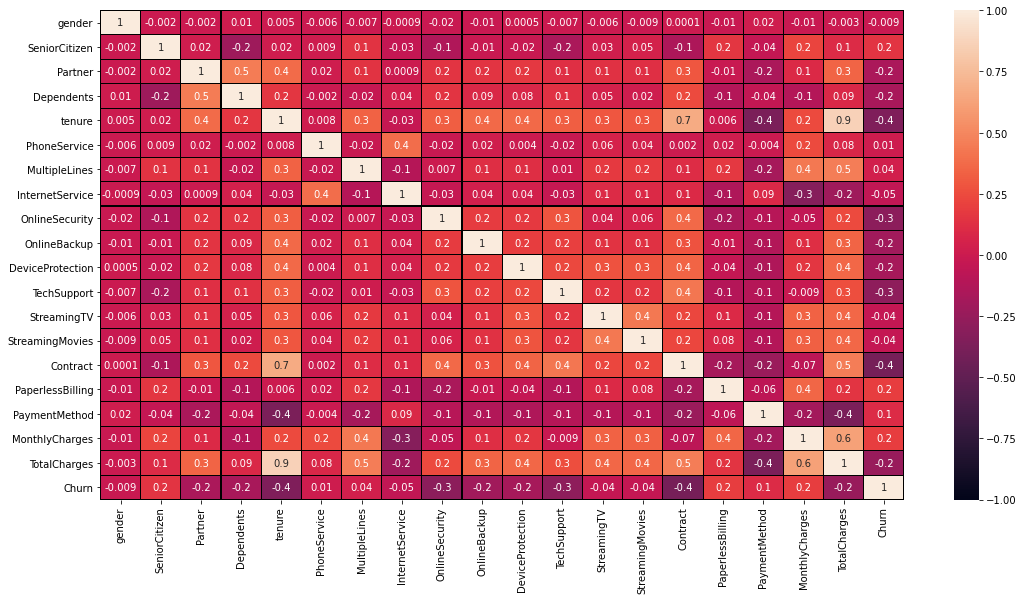

In [94]:
# Lets visualize above correlation table using Heatmap
plt.figure(figsize=(18,9))
sns.heatmap(df.corr(),linewidth=.1,vmin=-1,vmax=1,fmt=".1g",annot=True, linecolor="black")
plt.yticks(rotation=0)

Observations:
    
    * Here in this heat map we can clearly see multicolinearity between columns tenure and TotalCharges.
    
    * Tenure and Contract has a strong correlation
    
    * MonthlyCharges and TotalCharges also has very good relation.
    
    * our Target column Churn is shares negative good relation with tenure and contract.

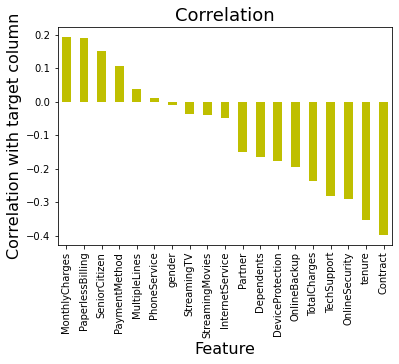

In [96]:
# lets check correlation of all columns with target column
df.corr()["Churn"].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='y')
plt.xlabel('Feature',fontsize=16)
plt.ylabel('Correlation with target column', fontsize=16)
plt.title('Correlation',fontsize=18)
plt.show()

* Here we can see that gender and phoneservice are very less correlated to target column.
* Most of the columns are negatively correlated with the target column

# Scaling:

In [97]:
# first lets separte feature and target column
x=df.drop('Churn',axis=1)
y=df['Churn']

In [98]:
# lets scale the data using standard scaler
# importing required libraries for standard scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [99]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-1.810588
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,0.253313
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-1.387269
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,0.232253
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-1.250118


* Here we can see that we have successfully scaled the data.

# Multicolinearity:

In [101]:
# lets check the Multicolinearity using VIF
#importing required libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_feat"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["Features"]=x.columns
vif

,vif_feat,Features
0,1.001684,gender
1,1.149730,SeniorCitizen
2,1.463075,Partner
3,1.384396,Dependents
4,10.690306,tenure
5,1.622399,PhoneService
6,1.397403,MultipleLines
7,1.866643,InternetService
8,1.252550,OnlineSecurity
9,1.188767,OnlineBackup


In [102]:
# Lets drop column with Multicolinearity
x=x.drop(["TotalCharges"],axis=1)

In [103]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif["Features"]=x.columns
vif

,vif_Features,Features
0,1.001684,gender
1,1.149639,SeniorCitizen
2,1.460856,Partner
3,1.382106,Dependents
4,2.754468,tenure
5,1.622282,PhoneService
6,1.391652,MultipleLines
7,1.825876,InternetService
8,1.247696,OnlineSecurity
9,1.185932,OnlineBackup


 * Now we can see that multicolinearity issue is solved and all the multicolinearity values came below acceptable limit of 10.

# OverSampling:

In [104]:
# lets balance the target variable using OverSampling
# Lets check the value_counts of target column
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [105]:
# Now lets balance the value count using SMOTE
# importing required libraries
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [106]:
# lets check value counts again
y.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

* Here we can see that we have successfully balanced the target column using SMOTE/Oversampling.

# Best Random State:

In [109]:
# lets import all required libraries
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [110]:
# lets find best random state and accuracy score
max_acc=0
max_rs=0
for i in range(1,250):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.27,random_state=i )
    mod=RandomForestClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>max_acc:
        max_acc=acc
        max_rs=i
print("Best accuracy is ",max_acc,"on random_state ",max_rs)

Best accuracy is  0.8690050107372942 on random_state  174


* Here Best Random State and accuracy score have predicted best accuracy score of 86.9% on random state 174

In [111]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.27, random_state=174)

# Classification Problem:
    Using Classification Algorithms

In [114]:
# importing all required libraries for model selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB as NB


# 1) KNeighborsClassifier::

In [115]:
knn=KNN()
knn.fit(x_train,y_train)
pred_k=knn.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test,pred_k))
print("Confusion Matrix: ",confusion_matrix(y_test,pred_k))
print(classification_report(y_test,pred_k))

Accuracy Score:  0.7899069434502506
Confusion Matrix:  [[ 960  455]
 [ 132 1247]]
              precision    recall  f1-score   support

           0       0.88      0.68      0.77      1415
           1       0.73      0.90      0.81      1379

    accuracy                           0.79      2794
   macro avg       0.81      0.79      0.79      2794
weighted avg       0.81      0.79      0.79      2794



* Here we can see that Knn is predicting score of 79%

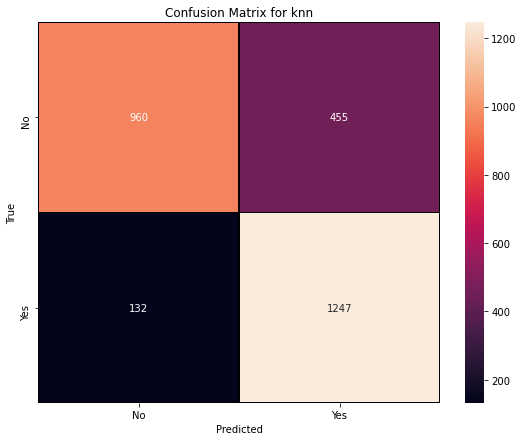

In [118]:
cm=confusion_matrix(y_test,pred_k)
x_axis_labels= ["No","Yes"]
y_axis_labels= ["No","Yes"]
f,ax = plt.subplots(figsize=(9,7))
sns.heatmap(cm, annot=True, linewidth=.2, linecolor="black",fmt='.0f',ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for knn')
plt.show()

# 2) ExtraTreesClassifier:

In [120]:
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
pred_e=etc.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test,pred_e))
print("Confusion Matrix: ",confusion_matrix(y_test,pred_e))
print(classification_report(y_test,pred_e))

Accuracy Score:  0.8750894774516822
Confusion Matrix:  [[1207  208]
 [ 141 1238]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.87      1415
           1       0.86      0.90      0.88      1379

    accuracy                           0.88      2794
   macro avg       0.88      0.88      0.88      2794
weighted avg       0.88      0.88      0.88      2794



* Here we can see score of 87.5% using ExtraTreesClassifier which is a good score.

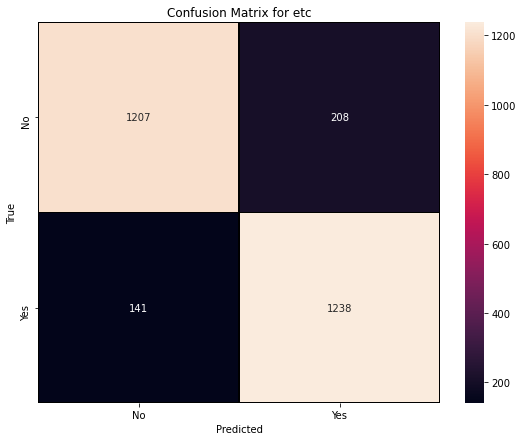

In [121]:
cm=confusion_matrix(y_test,pred_e)
x_axis_labels= ["No","Yes"]
y_axis_labels= ["No","Yes"]
f,ax = plt.subplots(figsize=(9,7))
sns.heatmap(cm, annot=True, linewidth=.2, linecolor="black",fmt='.0f',ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for etc')
plt.show()

# 3) Gradient Boosting Classifier:

In [122]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred_g=gbc.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test,pred_g))
print("Confusion Matrix: ",confusion_matrix(y_test,pred_g))
print(classification_report(y_test,pred_e))

Accuracy Score:  0.8561202576950608
Confusion Matrix:  [[1163  252]
 [ 150 1229]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.87      1415
           1       0.86      0.90      0.88      1379

    accuracy                           0.88      2794
   macro avg       0.88      0.88      0.88      2794
weighted avg       0.88      0.88      0.88      2794



* Here we can see that Gradient Boosting Classifier has given accuracy score of 85.61%

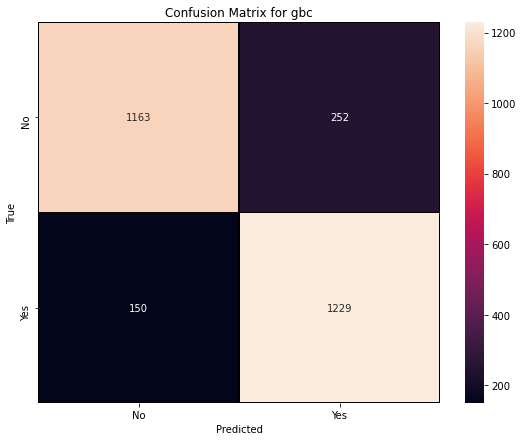

In [123]:
cm=confusion_matrix(y_test,pred_g)
x_axis_labels= ["No","Yes"]
y_axis_labels= ["No","Yes"]
f,ax = plt.subplots(figsize=(9,7))
sns.heatmap(cm, annot=True, linewidth=.2, linecolor="black",fmt='.0f',ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for gbc')
plt.show()

# 4) Decision Tree Classifier:

In [124]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_d=dtc.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test,pred_d))
print("Confusion Matrix: ",confusion_matrix(y_test,pred_d))
print(classification_report(y_test,pred_d))

Accuracy Score:  0.8045812455261274
Confusion Matrix:  [[1131  284]
 [ 262 1117]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1415
           1       0.80      0.81      0.80      1379

    accuracy                           0.80      2794
   macro avg       0.80      0.80      0.80      2794
weighted avg       0.80      0.80      0.80      2794



* Here Decision Tree Classifier is giving score of 80.48%

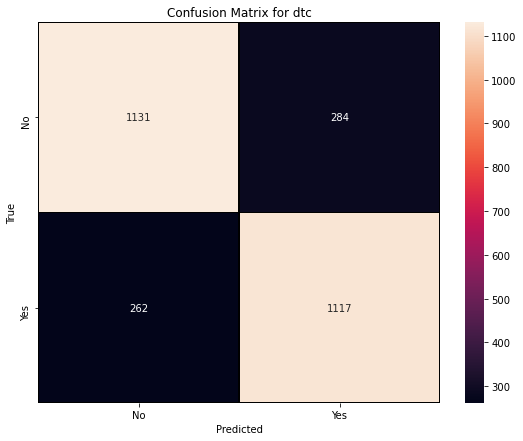

In [125]:
cm=confusion_matrix(y_test,pred_d)
x_axis_labels= ["No","Yes"]
y_axis_labels= ["No","Yes"]
f,ax = plt.subplots(figsize=(9,7))
sns.heatmap(cm, annot=True, linewidth=.2, linecolor="black",fmt='.0f',ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for dtc')
plt.show()

# 5) Random Forest Classifier:

In [126]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_r=rfc.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test,pred_r))
print("Confusion Matrix: ",confusion_matrix(y_test,pred_r))
print(classification_report(y_test,pred_r))

Accuracy Score:  0.8700787401574803
Confusion Matrix:  [[1207  208]
 [ 155 1224]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1415
           1       0.85      0.89      0.87      1379

    accuracy                           0.87      2794
   macro avg       0.87      0.87      0.87      2794
weighted avg       0.87      0.87      0.87      2794



* Here we can see that RandomForestClassifier is giving very good score of 87%

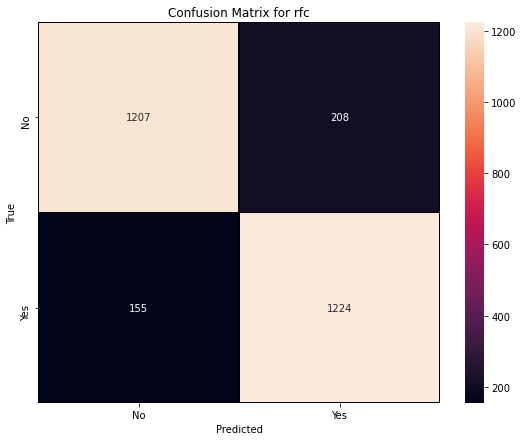

In [127]:
cm=confusion_matrix(y_test,pred_r)
x_axis_labels= ["No","Yes"]
y_axis_labels= ["No","Yes"]
f,ax = plt.subplots(figsize=(9,7))
sns.heatmap(cm, annot=True, linewidth=.2, linecolor="black",fmt='.0f',ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for rfc')
plt.show()

# Cross Validation Scores:

In [128]:
# Lets import required library
from sklearn.model_selection import cross_val_score

In [129]:
# cv score for KNN
print(cross_val_score(knn,x,y,cv=5).mean())

0.7879801906683197


In [130]:
# cv score for etc
print(cross_val_score(etc,x,y,cv=5).mean())

0.868291293373774


In [131]:
# cv score for gbc
print(cross_val_score(gbc,x,y,cv=5).mean())

0.8324412129363061


In [132]:
# cv score for dtc
print(cross_val_score(dtc,x,y,cv=5).mean())

0.7866350053586064


In [133]:
# cv score for rfc
print(cross_val_score(rfc,x,y,cv=5).mean())

0.8552478151129044


* Here the Cross Validation scores of all the models

 * Least difference between model accuracy and cross_val_score. we got least difference in etc i.e. ExtraTreesClassifier. so i found etc as my best model 

# hyper parameter Turning:

In [134]:
# lets import required library
from sklearn.model_selection import GridSearchCV

In [135]:
parameter= {'criterion':['gini','entropy'],
             'random_state': [10,100,1000],
             'n_jobs':[-2,-1,1,2],
             'n_estimators':[100,200,300],
             'max_depth': [0,10,20]}

In [138]:
gcv=GridSearchCV(ExtraTreesClassifier(),parameter,cv=5)

In [139]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [100, 200, 300],
                         'n_jobs': [-2, -1, 1, 2],
                         'random_state': [10, 100, 1000]})

In [140]:
gcv.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 1000}

In [141]:
Churn_mod=ExtraTreesClassifier(criterion='gini', max_depth=20,n_estimators=200, n_jobs=-2, random_state=1000)
Churn_mod.fit(x_train,y_train)
pred=Churn_mod.predict(x_test)
acc=accuracy_score(y_test, pred)

print('Accuracy Score:',(accuracy_score(y_test,pred)*100))
print('Confusion matrix:',confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy Score: 87.58052970651396
Confusion matrix: [[1183  232]
 [ 115 1264]]
              precision    recall  f1-score   support

           0       0.91      0.84      0.87      1415
           1       0.84      0.92      0.88      1379

    accuracy                           0.88      2794
   macro avg       0.88      0.88      0.88      2794
weighted avg       0.88      0.88      0.88      2794



* After hypertuning we can see slight jump in our final model performance previosly it was 87.50% and now it is 87.58%

# ROC-AUC-curve:

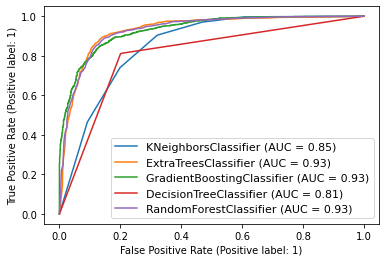

In [145]:
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 
disp = plot_roc_curve(knn,x_test,y_test)
# ax_=Axes with confusion matrix
plot_roc_curve(etc, x_test, y_test, ax=disp.ax_)     
plot_roc_curve(gbc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(dtc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(rfc, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

* Here are the ROC curves for all the models that i have predicted.And the AUC values can also be seen in the plot.

# Saving The Model:

In [146]:
#Saving the model as .pkl file
import joblib
joblib.dump(Churn_mod,"CustomerChurn.pkl")

['CustomerChurn.pkl']

* We have successfully saved the model

# Loading and predicting:

In [147]:
# Loading the saved model
model=joblib.load("CustomerChurn.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([1, 0, 1, ..., 0, 0, 0])

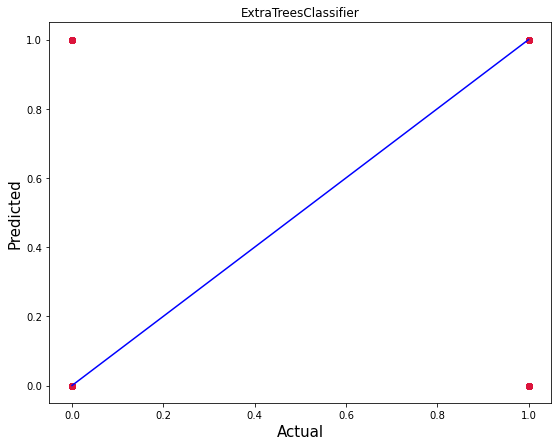

In [148]:
plt.figure(figsize=(9,7))
plt.scatter(y_test, prediction, c='crimson')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("ExtraTreesClassifier")
plt.show()


* Here in the picture Actual vs Predicted, Blues line is the actual calues and red dots are predicted values.